In [1]:
%pip install numpy
%pip install pandas
%pip install scikit-learn
%pip install matplotlib
%pip install seaborn


[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: pip3.9 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: pip3.9 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: pip3.9 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: pip3.9 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: pip3.9 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [58]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
df = pd.read_csv('Datasets/bank-customer-churn-prediction.csv')

In [86]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [87]:
df.info

<bound method DataFrame.info of       customer_id  credit_score  country  gender  age  tenure    balance  \
0        15634602           619   France  Female   42       2       0.00   
1        15647311           608    Spain  Female   41       1   83807.86   
2        15619304           502   France  Female   42       8  159660.80   
3        15701354           699   France  Female   39       1       0.00   
4        15737888           850    Spain  Female   43       2  125510.82   
...           ...           ...      ...     ...  ...     ...        ...   
9995     15606229           771   France    Male   39       5       0.00   
9996     15569892           516   France    Male   35      10   57369.61   
9997     15584532           709   France  Female   36       7       0.00   
9998     15682355           772  Germany    Male   42       3   75075.31   
9999     15628319           792   France  Female   28       4  130142.79   

      products_number  credit_card  active_member  esti

In [88]:
# low = 1%     100 rows
# medium = 5%  500 rows
# high = 10%   1000 rows

In [89]:
# Point anomaly generation 30%
# Contextual anomaly generation 70%

In [90]:
# Point anomaly generation
# IQR
# Z-Scores
# Boxplots
# Histogram

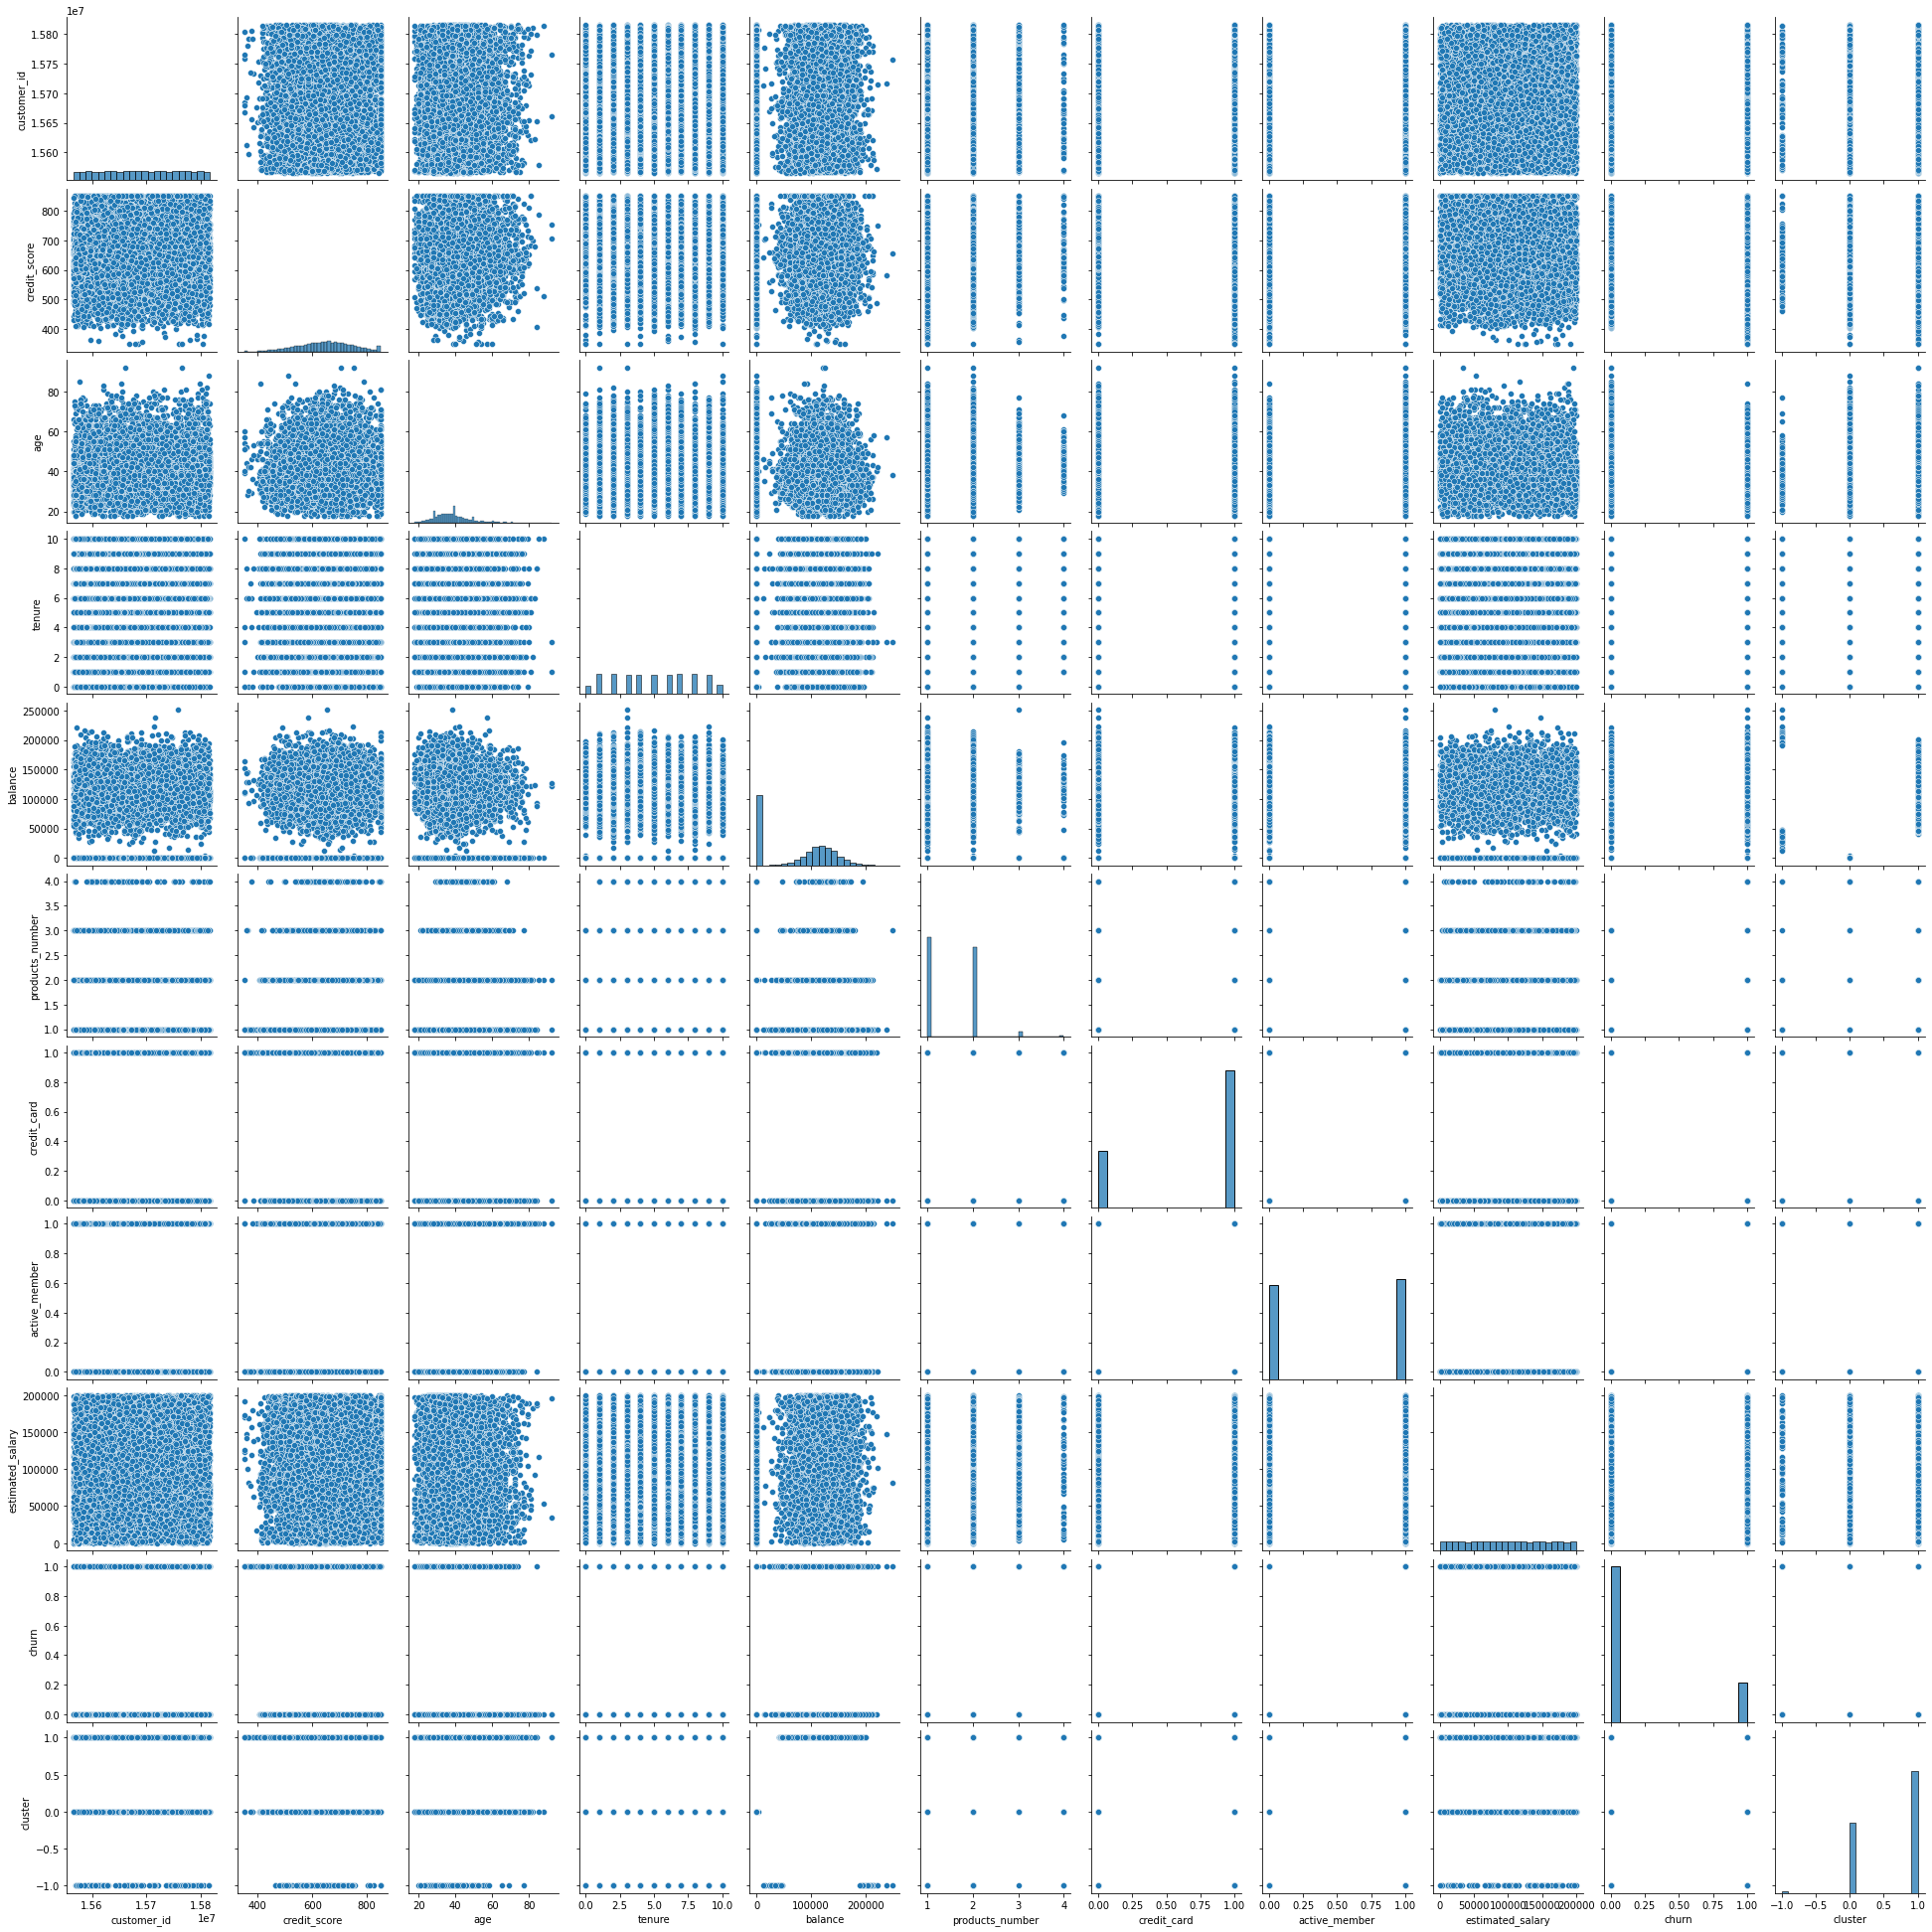

In [100]:
df_float = df.select_dtypes(include=['float64', 'int64'])
sns.pairplot(df_float)

cluster
 1    6289
 0    3618
-1      93
Name: count, dtype: int64


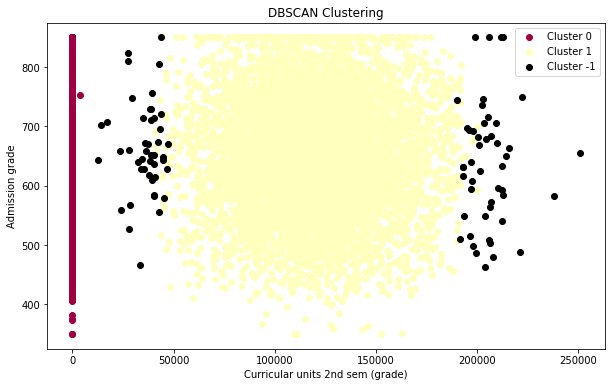

   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  \
0                1            1              1         101348.88      1   
1                1            0              1         112542.58      0   
2                3            1              0         113931.57      1   
3                2            0              0          93826.63      0   
4                1            1              1          79084.10      0   

   cluster  
0        0  
1        1  
2        1  
3        0  
4        1  


In [109]:
numerical_cols = df.select_dtypes(include=['float64']).columns
numerical_data = df[numerical_cols]

# Standardize the data (important for DBSCAN)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# DBSCAN parameters
eps = 0.16  # Maximum distance for two samples to be considered as in the same neighborhood
min_samples = 10  # Minimum number of samples for a point to be considered as a core point

# Run DBSCAN
db = DBSCAN(eps=eps, min_samples=min_samples)
df['cluster'] = db.fit_predict(scaled_data)

# Check how many points belong to each cluster (including noise)
print(df['cluster'].value_counts())

# Visualize the clustering results using the 'Curricular units 2nd sem (grade)' and 'Admission grade' columns
plt.figure(figsize=(10, 6))

# Define unique labels and their associated colors
unique_labels = set(df['cluster'])
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Plot each cluster with a distinct color
for label, color in zip(unique_labels, colors):
    if label == -1:
        # Noise points (DBSCAN labels them as -1)
        color = 'k'  # Black for noise
    cluster_data = df[df['cluster'] == label]
    plt.scatter(cluster_data['balance'], 
                cluster_data['credit_score'], 
                color=color, label=f"Cluster {label}")

# Add plot title and labels
plt.title("DBSCAN Clustering")
plt.xlabel('Curricular units 2nd sem (grade)')  # X-axis label
plt.ylabel('Admission grade')  # Y-axis label
plt.legend()
plt.show()

# Display the resulting DataFrame with clusters
print(df.head())

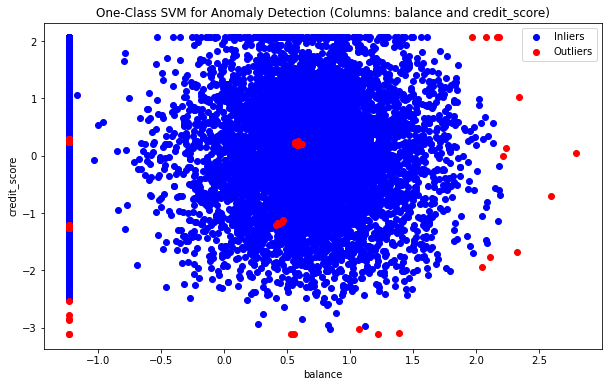

Predictions (1: inlier, -1: outlier): [1 1 1 1 1 1 1 1 1 1]


In [108]:
# Define the columns you want to use for the SVM (e.g., 'Feature1' and 'Feature2')
x_column = 'balance'
y_column = 'credit_score'

# Extract the selected columns
X = df[[x_column, y_column]]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the One-Class SVM model
model = OneClassSVM(nu=0.005, kernel="rbf", gamma="scale")
model.fit(X_scaled)

# Predict anomalies (1: inliers, -1: outliers)
y_pred = model.predict(X_scaled)

# Visualize the results
plt.figure(figsize=(10, 6))

# Inliers (predicted as 1)
plt.scatter(X_scaled[y_pred == 1, 0], X_scaled[y_pred == 1, 1], color='blue', label='Inliers')

# Outliers (predicted as -1)
plt.scatter(X_scaled[y_pred == -1, 0], X_scaled[y_pred == -1, 1], color='red', label='Outliers')

plt.title(f"One-Class SVM for Anomaly Detection (Columns: {x_column} and {y_column})")
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.legend()
plt.show()

# Show the predictions for the first few points
print("Predictions (1: inlier, -1: outlier):", y_pred[:10])

In [136]:
numerical_columns = ['credit_score', 'age', 'tenure', 'balance', 
                     'products_number', 'credit_card', 
                     'active_member', 'estimated_salary']
numerical_data = df[numerical_columns]

# Standardize the data for DBSCAN
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Apply DBSCAN
dbscan = DBSCAN(eps=2, min_samples=5)  # Initial parameters, can be adjusted
dbscan_labels = dbscan.fit_predict(scaled_data)

# Add DBSCAN labels to the original data
df['dbscan_label'] = dbscan_labels

# Filter rows considered anomalous (label == -1)
anomalous_data = df[df['dbscan_label'] == -1]

# Display the anomalous rows
print(anomalous_data)

      customer_id  credit_score  country  gender  age  tenure    balance  \
7        15656148           376  Germany  Female   29       4  115046.74   
1193     15779947           363    Spain  Female   28       6  146098.43   
1469     15670374           819  Germany  Female   49       1  120656.86   
1701     15605279           792   France    Male   50       9       0.00   
1993     15787189           824  Germany    Male   60       8  134250.17   
2124     15603851           704   France    Male   32       7  127785.17   
2509     15689341           655   France  Female   50      10       0.00   
2541     15679770           611   France  Female   61       3  131583.59   
3531     15653251           408   France  Female   84       8   87873.39   
4013     15653776           720  Germany  Female   57       1  162082.31   
4606     15784958           797   France  Female   55      10       0.00   
4654     15593976           578  Germany  Female   31       5  102088.68   
4822     158

In [137]:
# Select numerical columns for anomaly detection
numerical_columns = ['credit_score', 'age', 'tenure', 'balance', 
                     'products_number', 'credit_card', 
                     'active_member', 'estimated_salary']
numerical_data = df[numerical_columns]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Apply One-Class SVM
svm_model = OneClassSVM(kernel='rbf', gamma='scale', nu=0.001)  # Adjust nu as needed
svm_labels = svm_model.fit_predict(scaled_data)

# Add SVM labels to the original data
df['svm_label'] = svm_labels

# Filter rows considered anomalous (label == -1)
anomalous_data_svm = df[df['svm_label'] == -1]

# Display the anomalous rows
print(anomalous_data_svm)

      customer_id  credit_score  country  gender  age  tenure    balance  \
7        15656148           376  Germany  Female   29       4  115046.74   
75       15780961           735   France  Female   21       1  178718.19   
149      15794413           416   France    Male   32       0       0.00   
284      15708608           799   France  Female   22       8  174185.98   
313      15797960           806  Germany  Female   59       0  135296.33   
...           ...           ...      ...     ...  ...     ...        ...   
9370     15732438           561   France    Male   43       4       0.00   
9472     15579345           775  Germany  Female   74       0  161371.50   
9587     15653050           719  Germany  Female   76      10   95052.29   
9646     15603111           850    Spain    Male   71      10   69608.14   
9679     15605067           472   France    Male   19       9       0.00   

      products_number  credit_card  active_member  estimated_salary  churn  \
7        

In [138]:
class DBSCAN:
    def __init__(self, eps=1.0, minPts=5, metric='euclidean'):
        sels.eps = eps
        self.minPts = minPts
        self.metric = metric
        
    def fit(self, dataframe):
        self.labels = np.zeros(len(dataframe), dtype=int) - 1
        self.clusters - []
        cid = 0
        for x in range(len(data)):
            if self.labels[i] == -1:
                neighbours = self.get_neighbours(dataframe, x)
                if len(neighbours) < self.minPts:
                    self.labels[x] = 0
                else:
                    cid += 1
                    self.clusters.append([i])
                    self.labels[y] = cid
                    for j in neighbours:

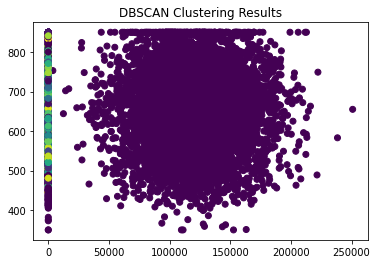

In [158]:
dbscan = DB(eps=0.1, min_samples=5)
dbscan.fit(df[['credit_score', 'balance']])
labels = dbscan.predict()
plt.scatter(df['balance'], df['credit_score'], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering Results')
plt.show()